# Sarah A. Thomas

# Project 7 - AllLife Bank

__Description__ (copied from assignment)

__Context__

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 
__Objective__

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


__Data Description__

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

__Data Dictionary__

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# 1 - Load Packages and Read in the Dataset

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

In [2]:
# load the data into pandas dataframe
bank = pd.read_excel("Credit Card Customer Data.xlsx")

<IPython.core.display.Javascript object>

# 2 - Data Preprocessing

## 2.1 - Check the first and last 10 rows and random 10 rows

In [3]:
bank.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


<IPython.core.display.Javascript object>

In [4]:
bank.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [5]:
np.random.seed(1)
bank.sample(n=10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

## 2.2 - Check the shape of the data

In [6]:
bank.shape

(660, 7)

<IPython.core.display.Javascript object>

## 2.3 - Check the datatypes and rows for each column

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

__Observation:__ After checking for duplicates, will drop S1_No and Customer Key as they do not provide any relevant information.

## 2.4 - Check for duplicates and drop unnecessary columns

In [8]:
bank.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# Since there are no duplicates, dropping unnecessary columns
bank.drop(["Sl_No"], axis=1, inplace=True)
bank.drop(["Customer Key"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# Making sure columns dropped successfully
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


<IPython.core.display.Javascript object>

# 3 - EDA

## 3.1 - Explore Summary of Data

In [11]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

__Observations:__
* Avg_Credit_Limit: Mean (34,574.24) is greater than median (18,000.00), indicating a right-skewed distribution.
* Total_Credit_Cards: Median (5.0) is greater than mean (4.71), indicating a slightly left-skewed distribution.
* Total_visits_bank: Mean (2.40) is greater than mean (2.0), indicating a right-skewed distribution.
* Total_visits_online: Mean (2.61) is greater than median (2.0), indicating a right-skewed distribution.
* Total_calls_made: Mean (3.58) is greater than median (3.0), indicating a right-skewed distribution.

## 3.2 - Univariate Analysis

In [12]:
# Function copied from prior case study:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 3.2.1 - Avg_Credit_Limit

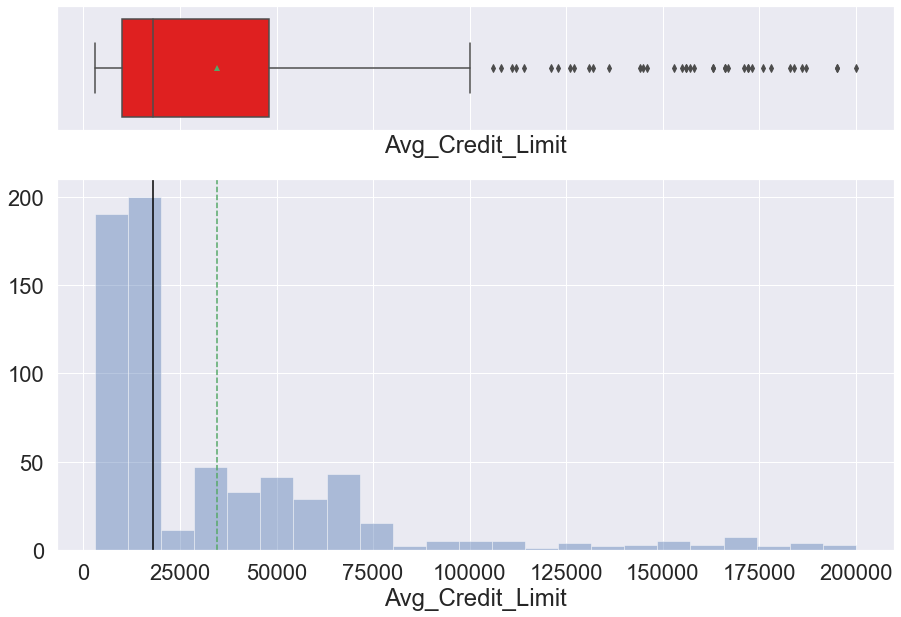

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(bank["Avg_Credit_Limit"])

__Observation__: Distribution is right-skewed. Outliers exist to the right and will be treated.

### 3.2.2 - Total_Credit_Cards

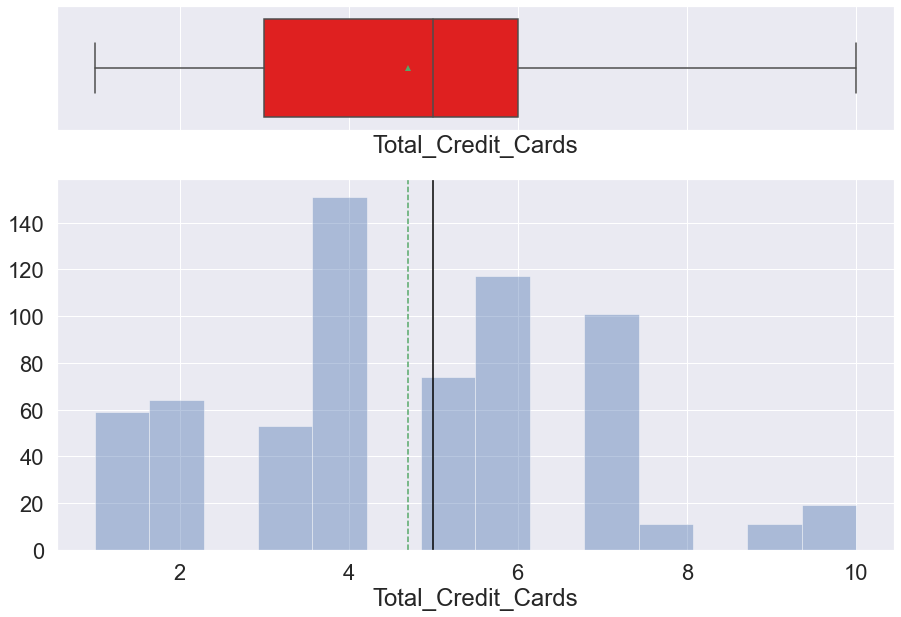

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(bank["Total_Credit_Cards"])

__Observation:__ Distribution is slightly left-skewed.

### 3.2.3 - Total_visits_bank

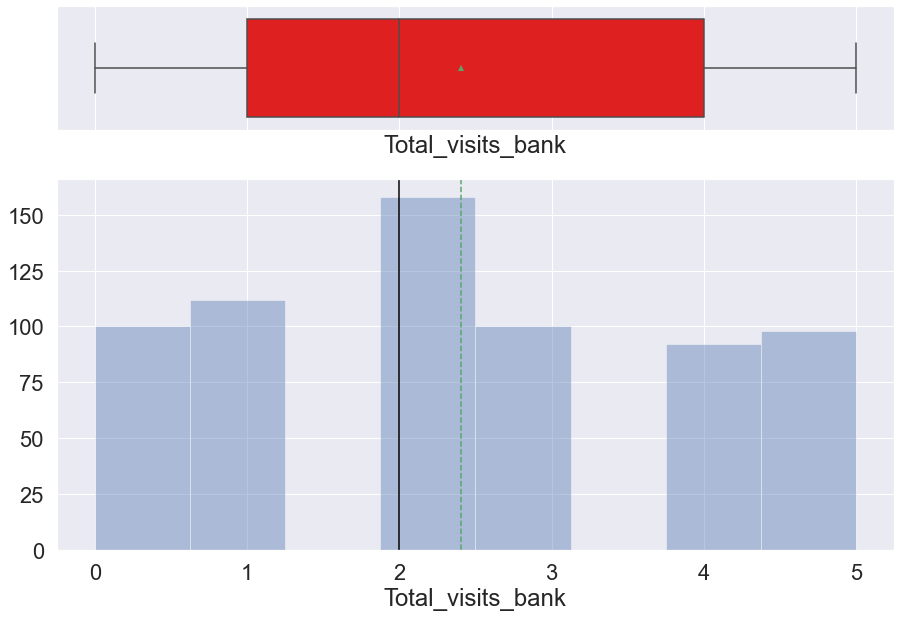

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(bank["Total_visits_bank"])

__Observation:__ Distribution is right-skewed.

### 3.3.4 - Total_visits_online

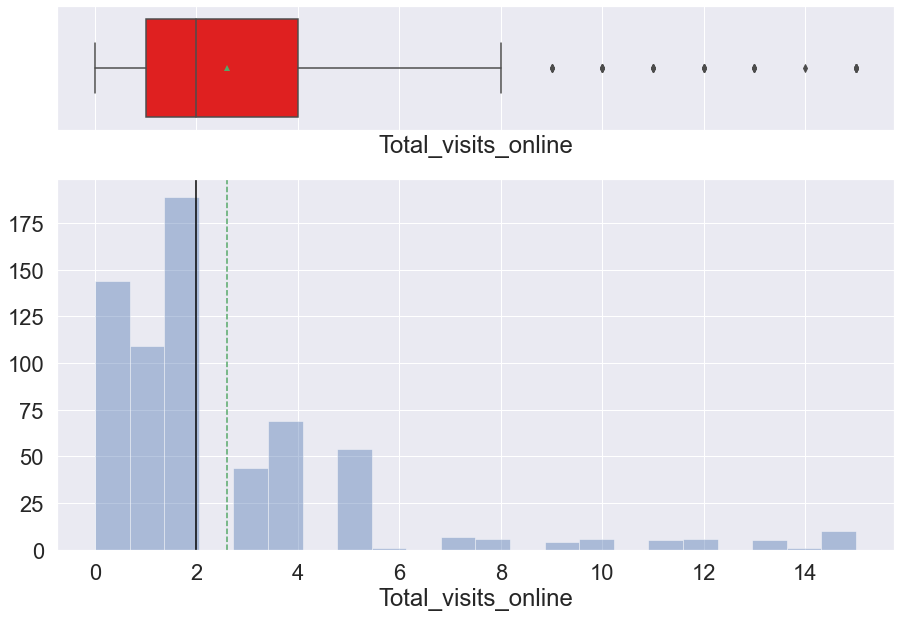

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(bank["Total_visits_online"])

__Observation:__ Distribution is right-skewed. Outliers exist to the right but the values are close to the other values so will not be treated.

### 3.2.5 - Total_calls_made

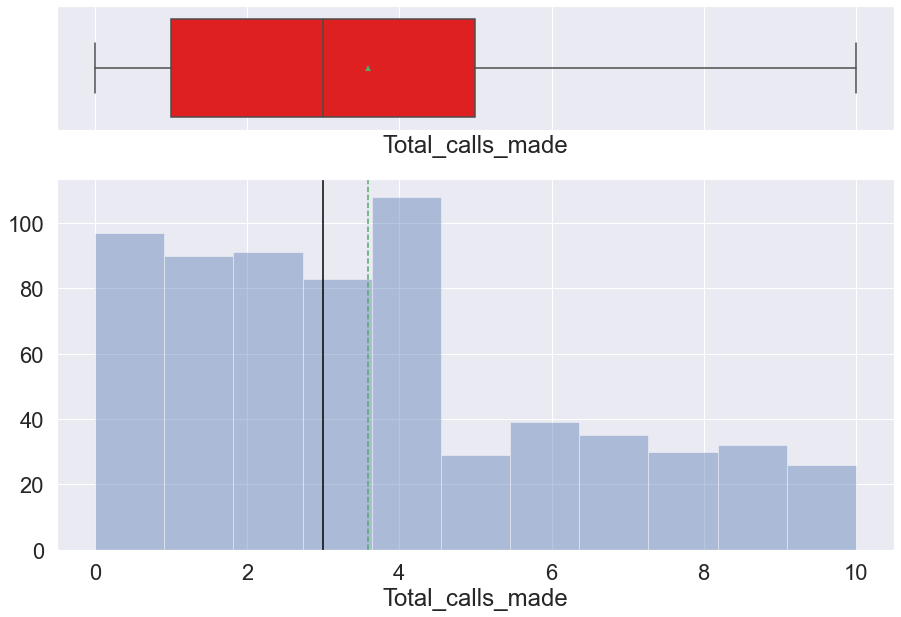

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(bank["Total_calls_made"])

__Observation:__ Distribution is right-skewed.

## 3.3 - Bivariate Analysis

### 3.3.1 - Correlation

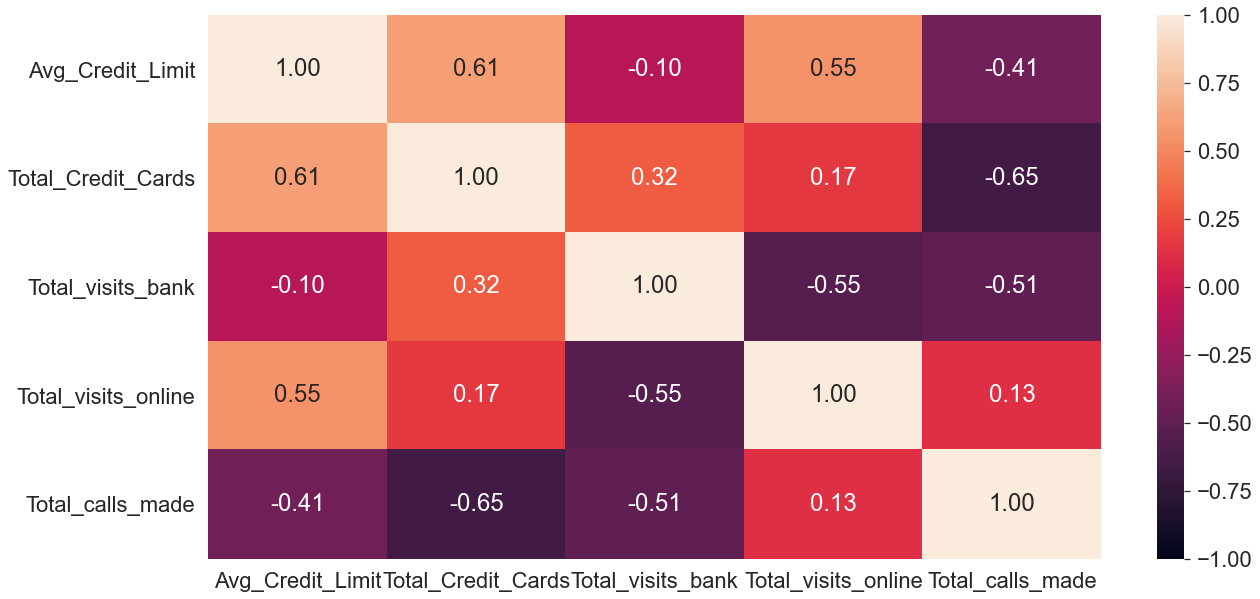

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(bank.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

The following are moderately correlated:
* Total_Credit_Cards and Avg_Credit_Limit (0.61)
* Total_visits_online and Avg_Credit_Limit (0.55)
* Total_calls_made and Avg_Credit_Limit (-0.41)
* Total_calls_made and Total_Credit_Cards (-0.65)
* Total_visits_online and Total_visits_bank (-0.55)
* Total_calls_made and Total_visits_bank (-0.51)

The following are slightly correlated:
* Total_visits_bank and Total_Credit_Cards (0.32)

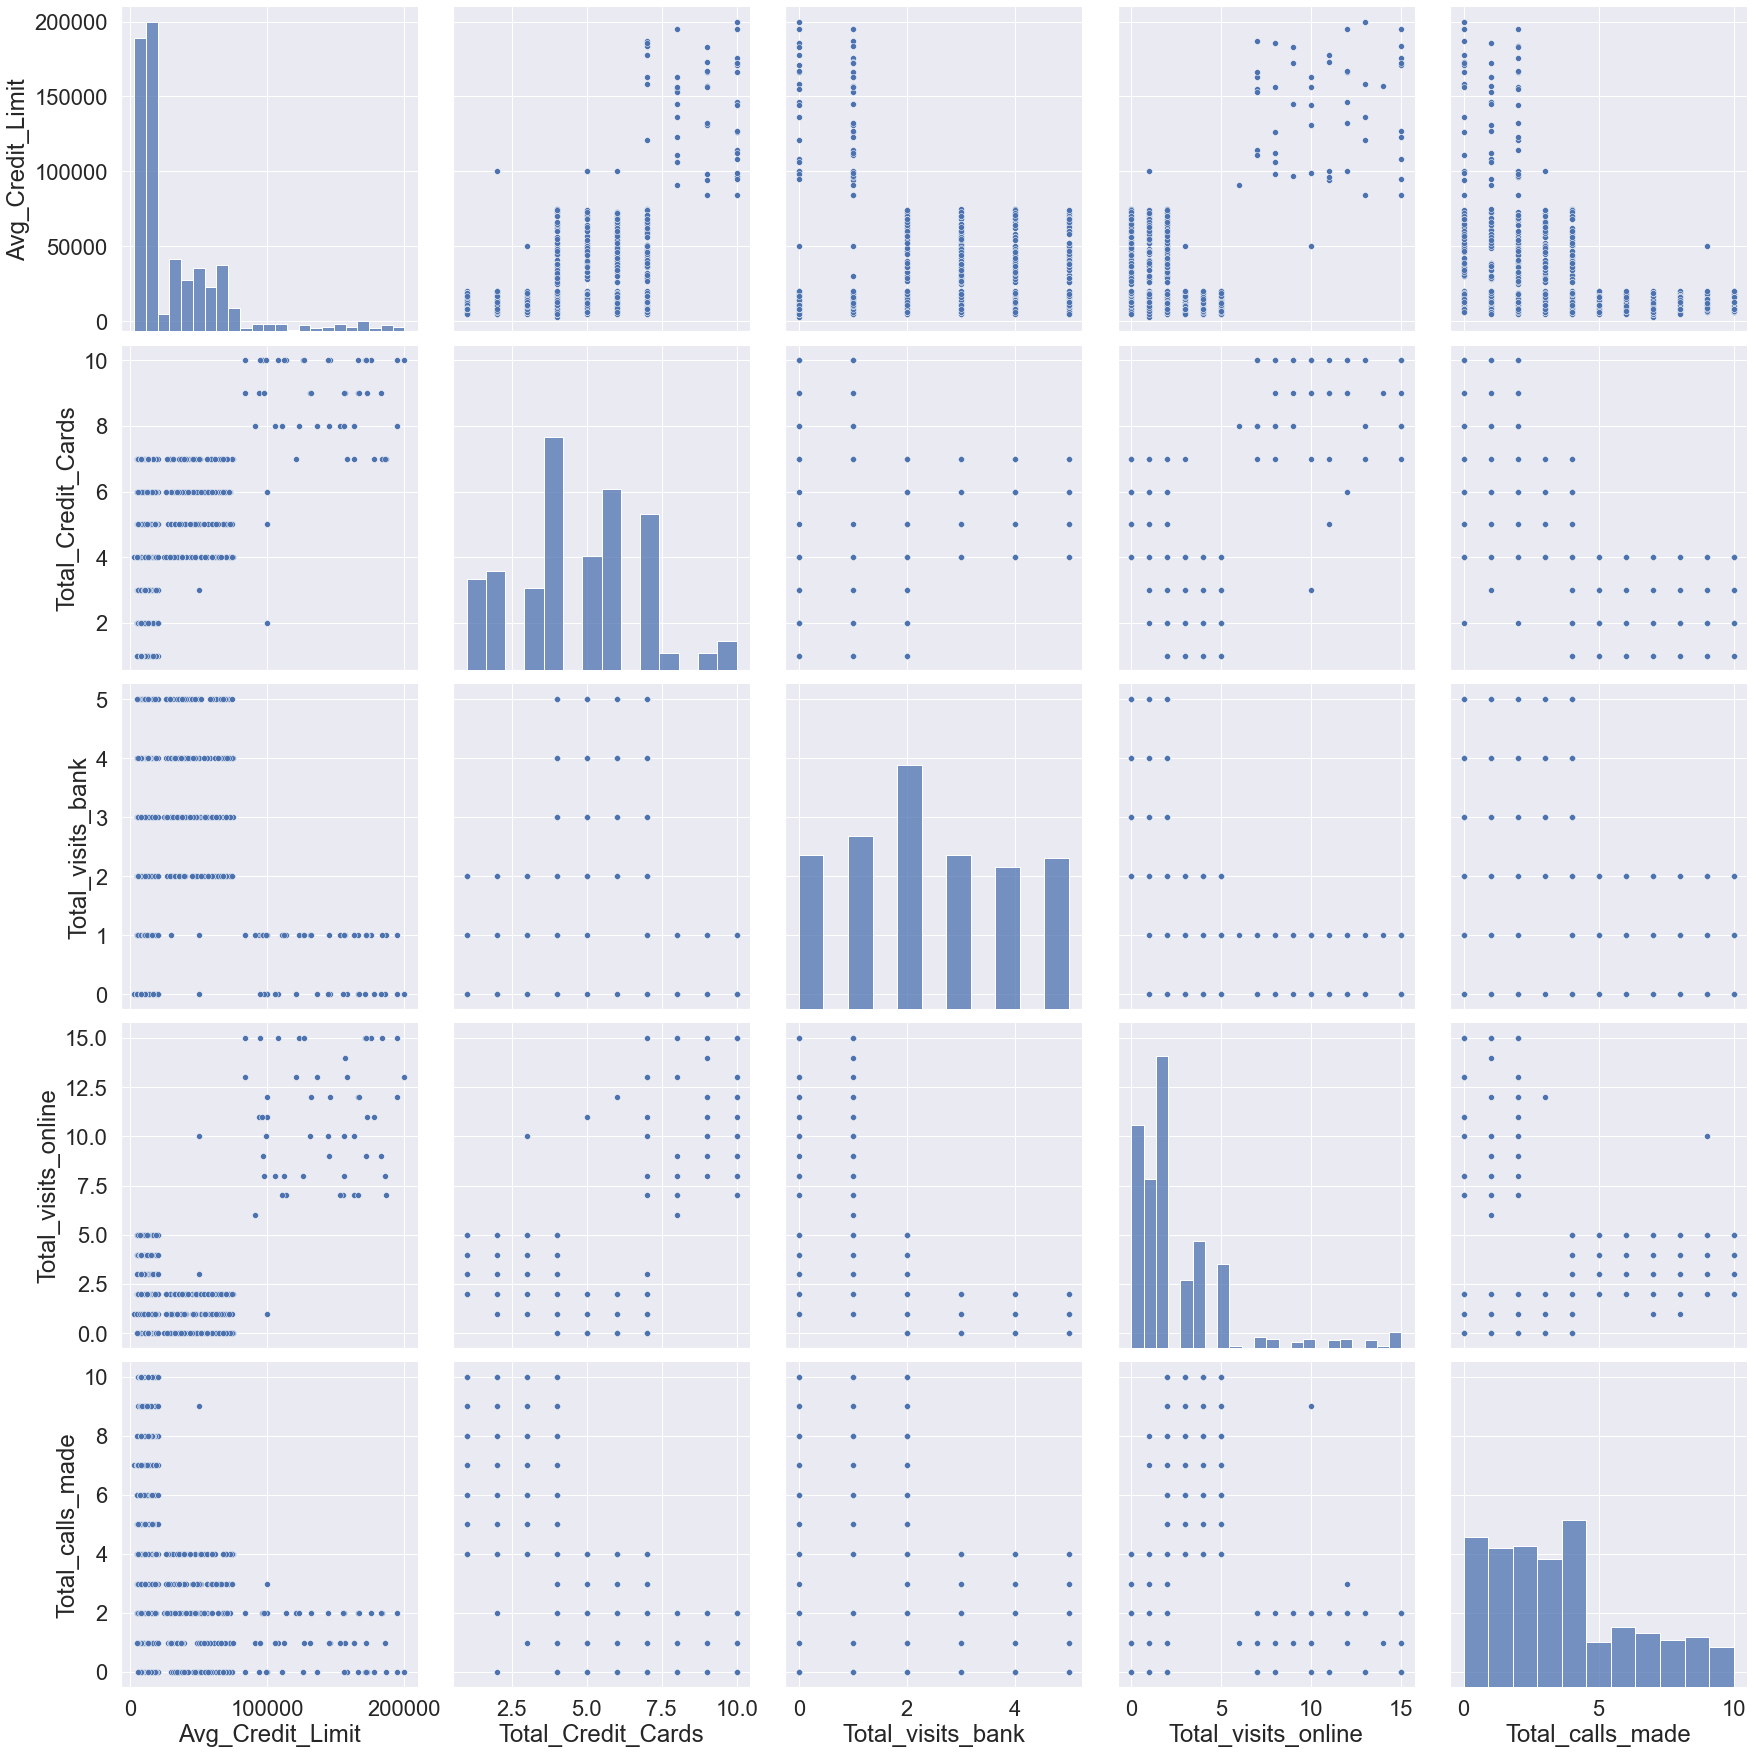

<IPython.core.display.Javascript object>

In [20]:
sns.pairplot(bank, height=5)
plt.show()

### 3.3.2 - Avg_Credit_Limit vs Total_Credit_Cards

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

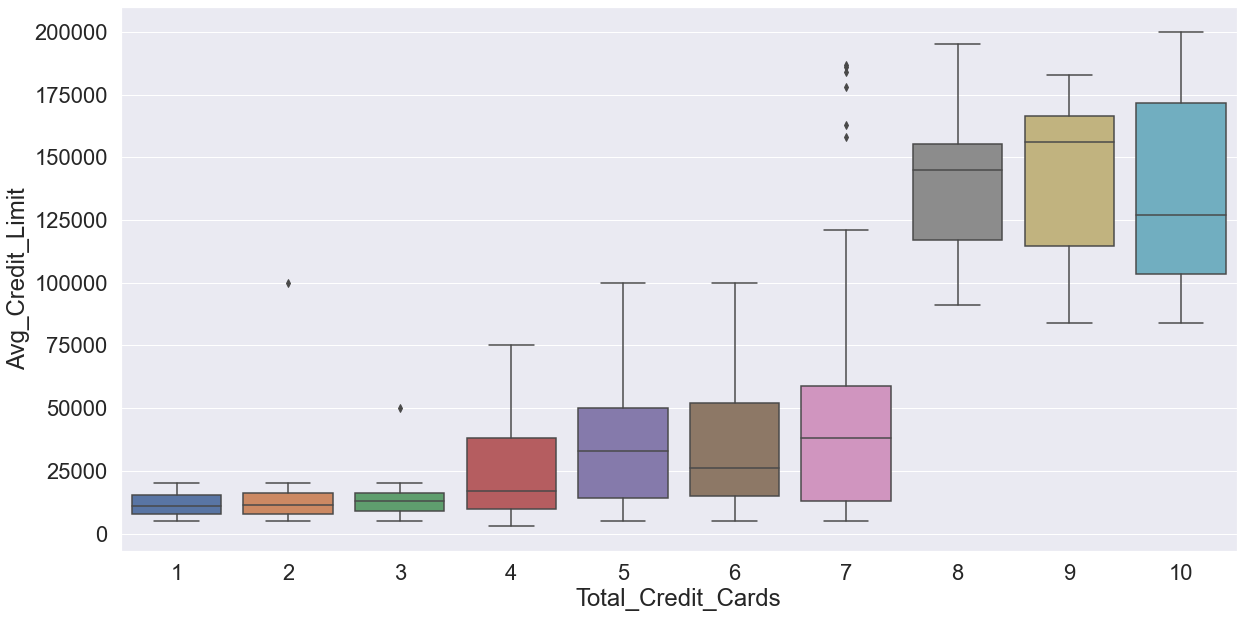

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(bank["Total_Credit_Cards"], bank["Avg_Credit_Limit"])

* As would be expected, the average credit limit increases with the number of total credit cards.

### 3.3.3 - Avg_Credit_Limit vs Total_visits_bank

<AxesSubplot:xlabel='Total_visits_bank', ylabel='Avg_Credit_Limit'>

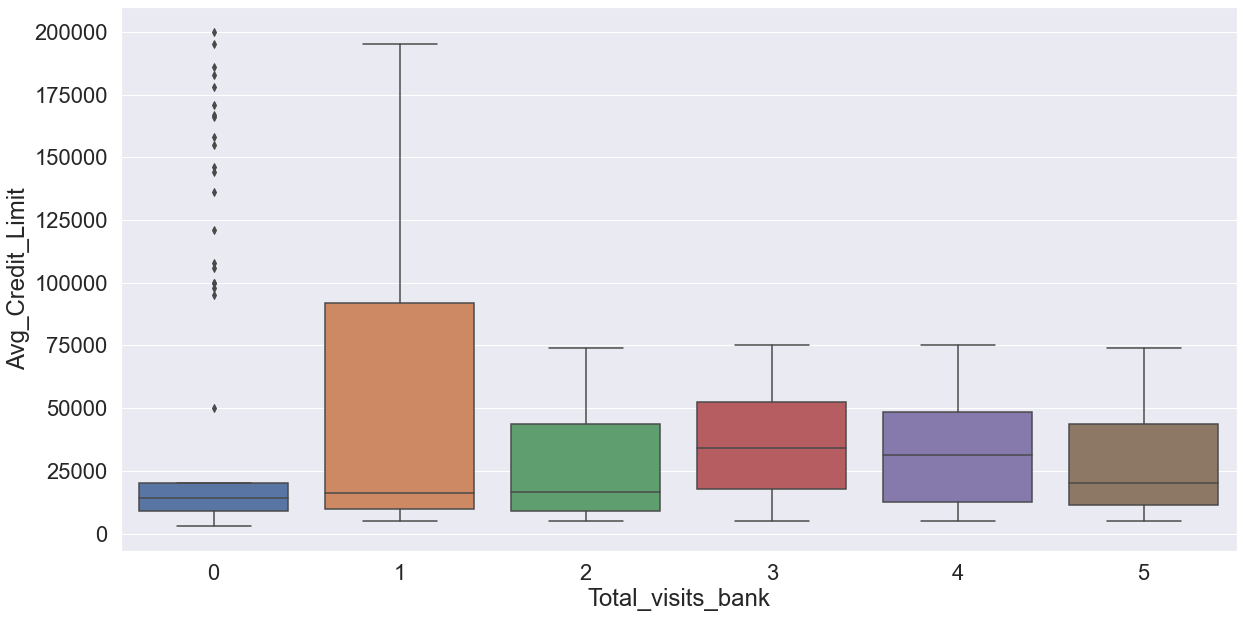

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(bank["Total_visits_bank"], bank["Avg_Credit_Limit"])

* Interestingly, those with higher credit limits visit the bank less.

### 3.3.4 - Avg_Credit_Limit vs Total_visits_online

<AxesSubplot:xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

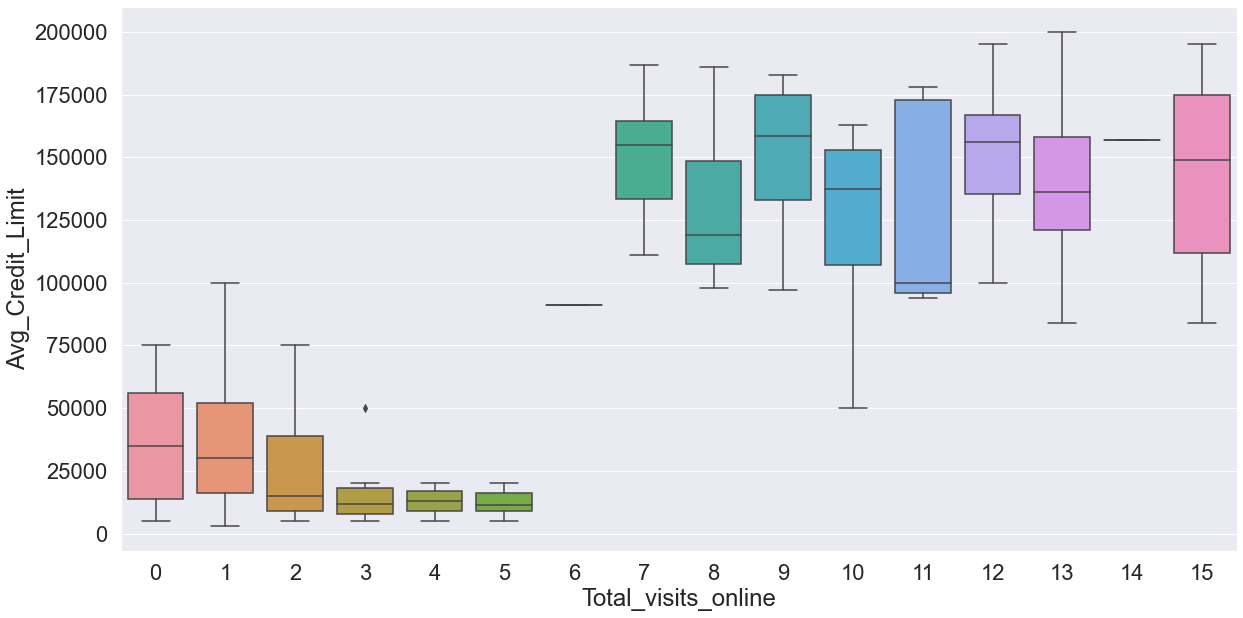

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(bank["Total_visits_online"], bank["Avg_Credit_Limit"])

* Those with higher credit limits do online banking at a higher rate.

### 3.3.5 - Avg_Credit_Limit vs Total_calls_made

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

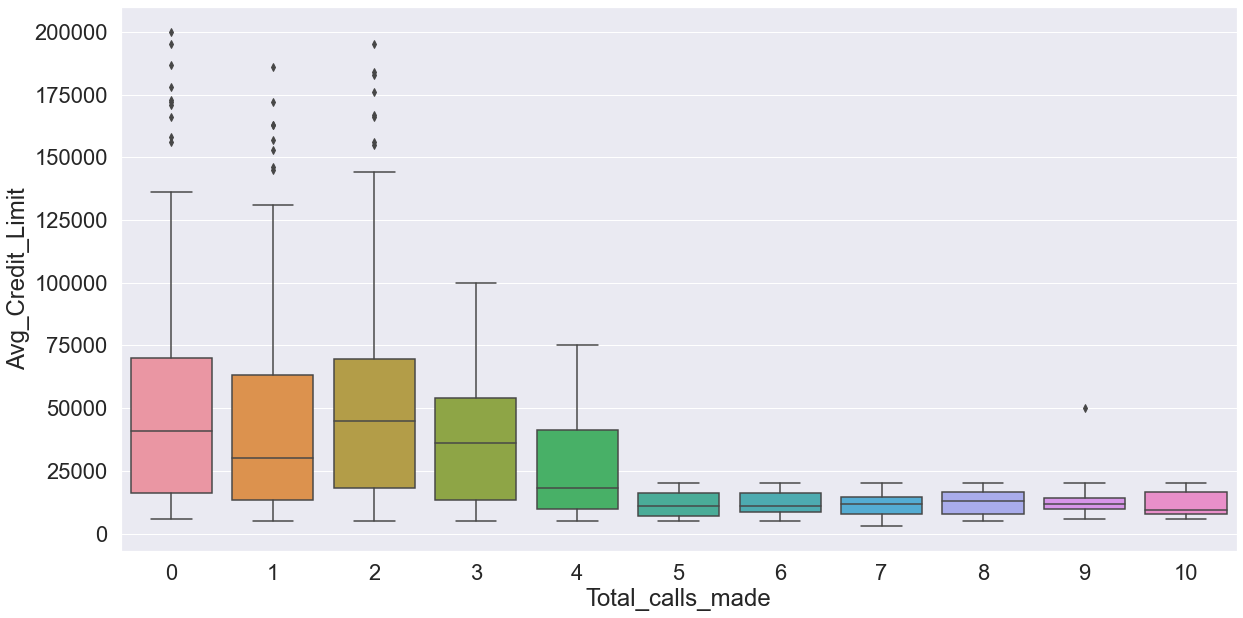

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(bank["Total_calls_made"], bank["Avg_Credit_Limit"])

* Those with lower credit limits made more calls to the bank.